In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
censor_training = pd.read_csv("censortraining.csv")

In [93]:
censor_training.head(10)

,number,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-04 17:51:00,23.180,27.2720,426.0,721.250000,0.004793,1
1,2,2015-02-04 17:51:59,23.150,27.2675,429.5,714.000000,0.004783,1
2,3,2015-02-04 17:53:00,23.150,27.2450,426.0,713.500000,0.004779,1
3,4,2015-02-04 17:54:00,23.150,27.2000,426.0,708.250000,0.004772,1
4,5,2015-02-04 17:55:00,23.100,27.2000,426.0,704.500000,0.004757,1
5,6,2015-02-04 17:55:59,23.100,27.2000,419.0,701.000000,0.004757,1
6,7,2015-02-04 17:57:00,23.100,27.2000,419.0,701.666667,0.004757,1
7,8,2015-02-04 17:57:59,23.100,27.2000,419.0,699.000000,0.004757,1
8,9,2015-02-04 17:58:59,23.100,27.2000,419.0,689.333333,0.004757,1
9,10,2015-02-04 18:00:00,23.075,27.1750,419.0,688.000000,0.004745,1


In [94]:
train_X_full    = censor_training.loc[:,['Temperature','Humidity', 'Light', 'CO2', 'HumidityRatio']]

In [95]:
train_Y_full = censor_training['Occupancy']

In [96]:
# Check for missing values
train_X_full.isnull().values.any()

False

In [97]:
train_X_full.shape

(8143, 5)

In [98]:
train_X_full.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863
std,1.016916,5.531211,194.755805,314.320877,0.000852
min,19.000000,16.745000,0.000000,412.750000,0.002674
25%,19.700000,20.200000,0.000000,439.000000,0.003078
50%,20.390000,26.222500,0.000000,453.500000,0.003801
75%,21.390000,30.533333,256.375000,638.833333,0.004352
max,23.180000,39.117500,1546.333333,2028.500000,0.006476


Check for class imbalance: Percentage of records showing Occupancy

In [99]:
sum(train_Y_full)/train_Y_full.shape[0]

0.2123296082524868

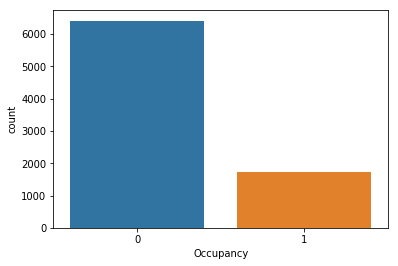

In [100]:
sns.countplot(train_Y_full,label="Count")
plt.show()

Currently 21% of the data has target as 1 whereas 79% of the data corresponds to target 0

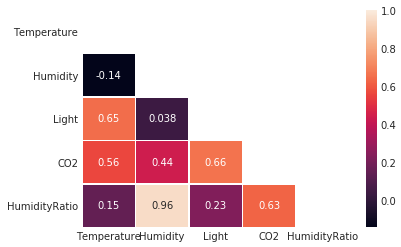

In [101]:
corr_full = train_X_full.corr()
    
mask = np.zeros_like(corr_full)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr_full, mask=mask, annot=True, linewidths=.5)

We see higher than 0.5 correlation for the below pairs of predictors - 

- Light & Temperature
- Humidity & Humidity ratio
- Light & CO2
- Humidity Ration & CO2

The variables are highly correlated for 1500 records

### Distributon of input variables

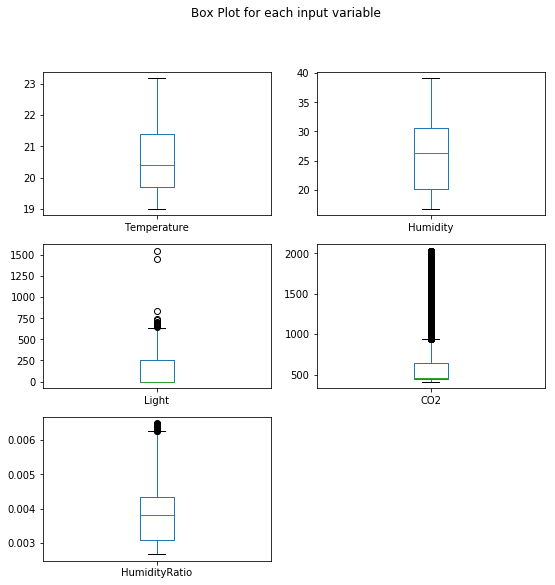

In [80]:
train_X_full.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot for each input variable')
plt.savefig('train_full_box')
plt.show()

Tempertaure, Humidity and Humidity ratio have a near Gaussian distribution

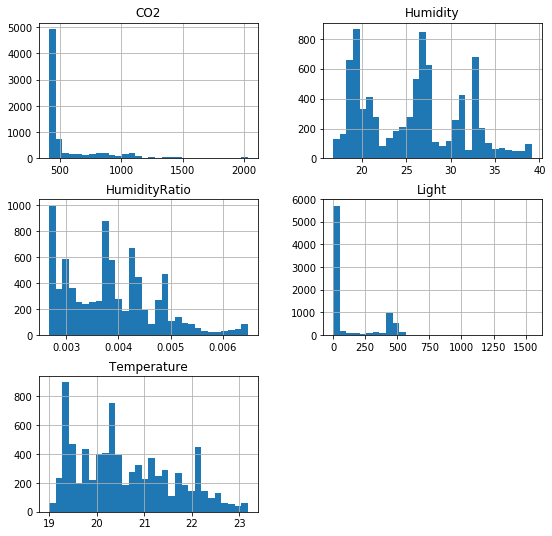

In [83]:
train_X_full.hist(bins=30, figsize=(9,9))
plt.title("Histogram for each numeric input variable")
plt.show()